<a href="https://colab.research.google.com/github/MelihKlc/Machine-Learning/blob/main/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
import random
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_random = 0  #max of random draws
  for i in range(0,d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i]+1) #betavariate() method in Python. betavariate() is an inbuilt method of the random module. It is used to return a random floating point number with beta distribution. The returned value is between 0 and 1.
    if(random_beta > max_random):
      max_random = random_beta
      ad = i  #bütün reklamları kontrol ediyoruz ve random beta eğer max randomdan büyükse ifin içine girip ad değerimizi o reklama eşitliyoruz çünkü en sonunda bize bu en yüksek random draw lazım
      #eğer random beta max randomdan büyük değilse if e gireyip dümdüz başa dönüyor loop.
  ads_selected.append(ad) #it contains all the ads that are selected over time up to 10000 rounds
  reward = dataset.values[ n , ad ]
  if( reward == 1 ):
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
     numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] +1
  total_reward = total_reward + reward


## Visualising the results - Histogram

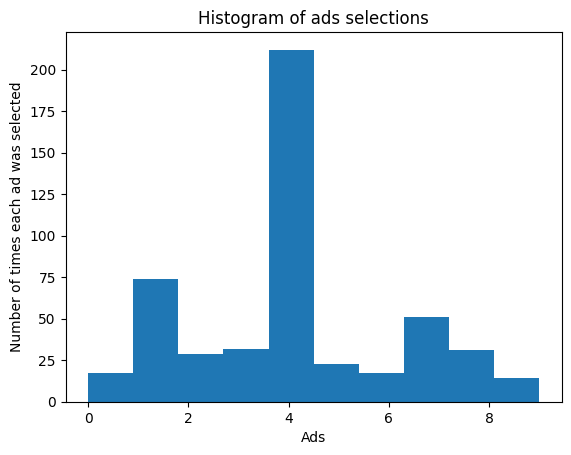

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()